# **Sequential network on Mnist**

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


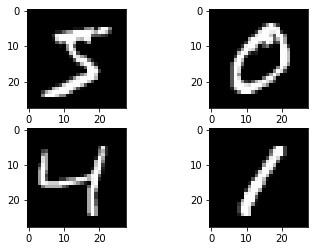

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot

plt.show()

In [0]:
from tqdm import tqdm
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as f
from keras.utils import np_utils

In [0]:
seed = 7
np.random.seed(seed)

In [0]:
#flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_train=torch.tensor(X_train).view(-1,num_pixels)
X_test = X_test / 255
X_test=torch.tensor(X_test)

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(num_pixels,num_pixels)
        self.fc2=nn.Linear(num_pixels,num_classes)

    def forward(self,x):

        x=f.relu(self.fc1(x.view(-1,num_pixels)))
        x=self.fc2(x)

        return f.softmax(x,dim=1)

In [0]:
net=Net()

In [31]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [32]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
batch=100
epochs=10
train_set_x=X_train
train_set_y=torch.tensor(y_train)
lossFunc=nn.MSELoss()
for epoch in range(epochs):
    for i in tqdm(range(0,len(X_train),batch)):
        x=train_set_x[i:i+batch]
        y=train_set_y[i:i+batch]
        net.zero_grad()
        output=net(x)
        loss=lossFunc(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

  2%|▏         | 11/600 [00:00<00:05, 100.27it/s]

tensor(0.0054, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:06, 86.80it/s]

tensor(0.0036, grad_fn=<MseLossBackward>)


  1%|▏         | 8/600 [00:00<00:07, 78.23it/s]

tensor(0.0024, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:06, 87.10it/s]

tensor(0.0023, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:06, 86.47it/s]

tensor(0.0022, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:07, 81.72it/s]

tensor(0.0027, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:07, 80.82it/s]

tensor(0.0031, grad_fn=<MseLossBackward>)


  1%|▏         | 8/600 [00:00<00:07, 76.09it/s]

tensor(0.0022, grad_fn=<MseLossBackward>)


  2%|▏         | 9/600 [00:00<00:07, 81.55it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


100%|██████████| 600/600 [00:07<00:00, 78.96it/s]

tensor(0.0021, grad_fn=<MseLossBackward>)


In [26]:
# train_set_y[0]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [27]:
# y[0]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [28]:
# output[0]

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000], grad_fn=<SelectBackward>)

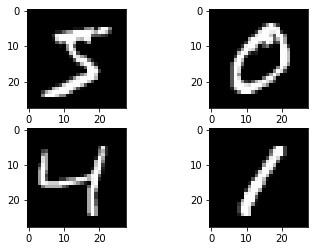

tensor(5)
tensor(0)
tensor(4)
tensor(1)


In [43]:
plt.subplot(221)
plt.imshow(X_train[0].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3].view(28,28), cmap=plt.get_cmap('gray'))
# show the plot

plt.show()
predictions=net(X_train[:4])
for i in range(4):
    print(predictions[i].argmax())

In [49]:
n=len(y_test)
cor=0
for i in tqdm(range(0,n,100)):
    x=X_test[i:i+100]
    y=y_test[i:i+100]
    output_test=net(x)
    for l in range(len(y)):
        if (y[l].argmax())==(output_test[l].argmax()):
            cor+=1
print("\naccuracy=",cor/n)


100%|██████████| 100/100 [00:00<00:00, 162.65it/s]


accuracy= 0.9763


# **CNN on MNIST**

In [0]:
class cnn_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,32,5)
        self.flat=0
        x=torch.randn(28,28).view(1,-1,28,28)
        self.flatten(x)
        self.fc1=nn.Linear(self.flat,128)
        self.fc2=nn.Linear(128,num_classes)

    def flatten(self,x):
        if(self.flat==0):
            x=f.dropout(f.max_pool2d(self.conv1(x),(2,2)))
            print(x.size())
            self.flat=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        print(self.flat)
        
    def forward(self,x):
        x=f.dropout(f.max_pool2d(f.relu(self.conv1(x)),(2,2)),p=0.2)
        x=f.relu(self.fc1(x.view(-1,self.flat)))
        x=self.fc2(x)
        return f.softmax(x,dim=1)


In [58]:
net=cnn_Net()

torch.Size([1, 32, 12, 12])
4608


In [60]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
batch=100
epochs=10
train_set_x=X_train.view(-1,1,28,28)
train_set_y=torch.tensor(y_train)
lossFunc=nn.MSELoss()
for epoch in range(epochs):
    for i in tqdm(range(0,len(X_train),batch)):
        x=train_set_x[i:i+batch]
        y=train_set_y[i:i+batch]
        net.zero_grad()
        output=net(x)
        loss=lossFunc(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

  0%|          | 2/600 [00:00<00:31, 19.24it/s]

tensor(0.0032, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.89it/s]

tensor(0.0028, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:32, 18.60it/s]

tensor(0.0028, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:33, 18.02it/s]

tensor(0.0024, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:34, 17.37it/s]

tensor(0.0023, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.80it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.89it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 19.01it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.90it/s]

tensor(0.0024, grad_fn=<MseLossBackward>)


100%|██████████| 600/600 [00:32<00:00, 18.69it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


In [61]:
n=len(y_test)
cor=0
for i in tqdm(range(0,n,100)):
    x=X_test[i:i+100]
    y=y_test[i:i+100]
    output_test=net(x.view(-1,1,28,28))
    for l in range(len(y)):
        if (y[l].argmax())==(output_test[l].argmax()):
            cor+=1
print("\naccuracy=",cor/n)


100%|██████████| 100/100 [00:02<00:00, 46.85it/s]


accuracy= 0.9877


# **CNN 2 for MNIST**


In [0]:
class cnn2_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,30,5)
        self.conv2=nn.Conv2d(30,15,3)
        self.flat=0
        x=torch.randn(28,28).view(1,-1,28,28)
        self.flatten(x)
        self.fc1=nn.Linear(self.flat,128)
        self.fc2=nn.Linear(128,50)
        self.fc3=nn.Linear(50,num_classes)

    def flatten(self,x):
        if(self.flat==0):
            x=(f.max_pool2d(self.conv1(x),(2,2)))
            x=f.dropout(f.max_pool2d(self.conv2(x),(2,2)),p=0.2)
            print(x.size())
            self.flat=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        print(self.flat)
        
    def forward(self,x):
        x=(f.max_pool2d(f.relu(self.conv1(x)),(2,2)))
        x=f.dropout(f.max_pool2d(f.relu(self.conv2(x)),(2,2)),p=0.2)
        x=f.relu(self.fc1(x.view(-1,self.flat)))

        x=f.relu(self.fc2(x))
        x=self.fc3(x)
        return f.softmax(x,dim=1)

In [68]:
net=cnn2_Net()

torch.Size([1, 15, 5, 5])
375


In [69]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
batch=100
epochs=10
train_set_x=X_train.view(-1,1,28,28)
train_set_y=torch.tensor(y_train)
lossFunc=nn.MSELoss()
for epoch in range(epochs):
    for i in tqdm(range(0,len(X_train),batch)):
        x=train_set_x[i:i+batch]
        y=train_set_y[i:i+batch]
        net.zero_grad()
        output=net(x)
        loss=lossFunc(output,y)
        loss.backward()
        optimizer.step()
    print("\n"loss)

  0%|          | 2/600 [00:00<00:32, 18.37it/s]

tensor(0.0050, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:32, 18.17it/s]

tensor(0.0037, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:32, 18.35it/s]

tensor(0.0027, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:33, 18.06it/s]

tensor(0.0031, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:32, 18.46it/s]

tensor(0.0027, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 19.26it/s]

tensor(0.0021, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:34, 17.19it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.84it/s]

tensor(0.0032, grad_fn=<MseLossBackward>)


  0%|          | 2/600 [00:00<00:31, 18.77it/s]

tensor(0.0020, grad_fn=<MseLossBackward>)


100%|██████████| 600/600 [00:32<00:00, 18.44it/s]

tensor(0.0023, grad_fn=<MseLossBackward>)


In [71]:
n=len(y_test)
cor=0
for i in tqdm(range(0,n,100)):
    x=X_test[i:i+100]
    y=y_test[i:i+100]
    output_test=net(x.view(-1,1,28,28))
    for l in range(len(y)):
        if (y[l].argmax())==(output_test[l].argmax()):
            cor+=1
print("\naccuracy=",cor/n)


100%|██████████| 100/100 [00:02<00:00, 39.20it/s]


accuracy= 0.9875
